In [1]:
from pdf2image import convert_from_path
import os
import matplotlib.pyplot as plt
import numpy as np
import fitz
import cv2

In [2]:
pdffile = "Story_One/Tinkle Digest 001.pdf"
doc = fitz.open(pdffile)
page = doc.load_page(0)  # number of page
pix = page.get_pixmap(dpi=100)
pix.save("Story_One/temp.png")

In [3]:
doc.page_count

101

In [3]:
pdf_dir = "Story_One/Tinkle Digest 001.pdf"
doc = fitz.open(pdf_dir)
# doc.page_count
for i in range(3):
    page = doc.load_page(i)  # number of page
    pix = page.get_pixmap(dpi=100)
    temp_png = "Story_One/temp/temp.png"
    pix.save(temp_png)
   

In [ ]:
 img = cv2.imread("/temp.png") 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
plt.show()

In [2]:
def maintain_aspect_ratio_resize(image, width=800, height=400, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    
#     if(h>w):
    r = height / float(h)
    width = int(w * r)
    r = width / float(w)
    height = int(h * r)
    dim = (width, height)
        
#     else:
#         r = width / float(w)
#         dim = (width, int(h * r))
    return cv2.resize(image, dim, interpolation=inter)

In [3]:
 def ret_boxes(img):
        img_array = []
        img = cv2.rectangle(img,(0,0),img.shape[:2][::-1],(255,255,255),10)
        plt.imshow(img)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        thresh_inv = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

        # Blur the image
        blur = cv2.GaussianBlur(thresh_inv,(1,1),0)

        thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

        # find contours
        contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

        mask = np.ones(img.shape[:2], dtype="uint8") * 255
        for c in contours:
            # get the bounding rect
            x, y, w, h = cv2.boundingRect(c)
            if w*h>(img.shape[0]*img.shape[1]/16) :
                cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)
                img_array.append(img[y:y+h,x:x+w])

        res_final = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))
        return(img_array[::-1])

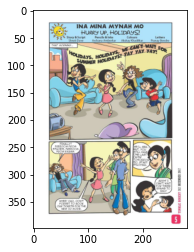

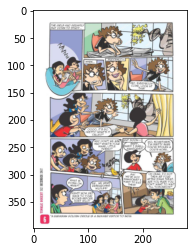

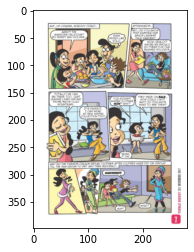

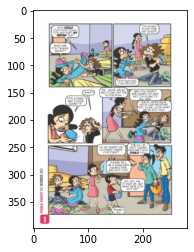

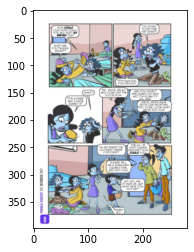

In [5]:
pdf_dir = "Story_One/Ina_mina_mynah_mo.pdf"
doc = fitz.open(pdf_dir)
# doc.page_count
for i in range(4):
    page = doc.load_page(i)  # number of page
    pix = page.get_pixmap(dpi=500)
    temp_png = "Story_One/temp/temp.jpeg"
    pix.save(temp_png)
    img = cv2.imread(temp_png) 
    img = maintain_aspect_ratio_resize(img)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
    plt.show()

   

    for im in ret_boxes(img):
#         plt.imshow(im)
#         plt.imshow(cv2.cvtColor(im,cv2.COLOR_RGB2BGR))
#         plt.show()
#         im = maintain_aspect_ratio_resize(im)
        cv2.imshow("pics",im)
        if(cv2.waitKey(500) &  0xff == 27):
            continue
cv2.destroyAllWindows()


In [20]:
cv2.destroyAllWindows()

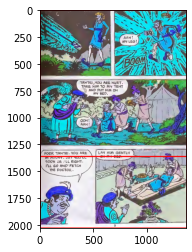

In [23]:
# plt.imshow(img)
plt.imshow(cv2.rectangle(img, (0,0),img.shape[:2][::-1],(255,0,0),10))